In [1]:
import pandas as pd
import numpy as np

In [2]:
Cardata=pd.read_csv(r"D:\CarPricePrediction-End-to-End-Deployment-master\CarPriceData.csv")

**EDA Part**


In [3]:
Cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
Cardata.shape

(301, 9)

In [5]:
Cardata.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
Cardata.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [7]:
Cardata.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
Cardata["PrstYr"]=2020

In [9]:
Cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,PrstYr
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [10]:
Cardata["YrDiff"]=Cardata['PrstYr']-Cardata['Year']

In [11]:
Cardata.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,PrstYr,YrDiff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9


In [12]:
Cardata=Cardata.drop(['Year','PrstYr','Car_Name'],1)

C:\Users\Amanc\AppData\Local\Temp\ipykernel_14516\3268354562.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Cardata=Cardata.drop(['Year','PrstYr','Car_Name'],1)


In [13]:
Cardata.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,YrDiff
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


In [14]:
Cardata.dtypes

Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
YrDiff             int64
dtype: object

In [15]:
Cardata=pd.get_dummies(Cardata,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [16]:
Cardata.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [17]:
Cardata.Fuel_Type_Diesel.value_counts()

0    241
1     60
Name: Fuel_Type_Diesel, dtype: int64

In [18]:
Cardata.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [19]:
import seaborn
import matplotlib.pyplot as plt

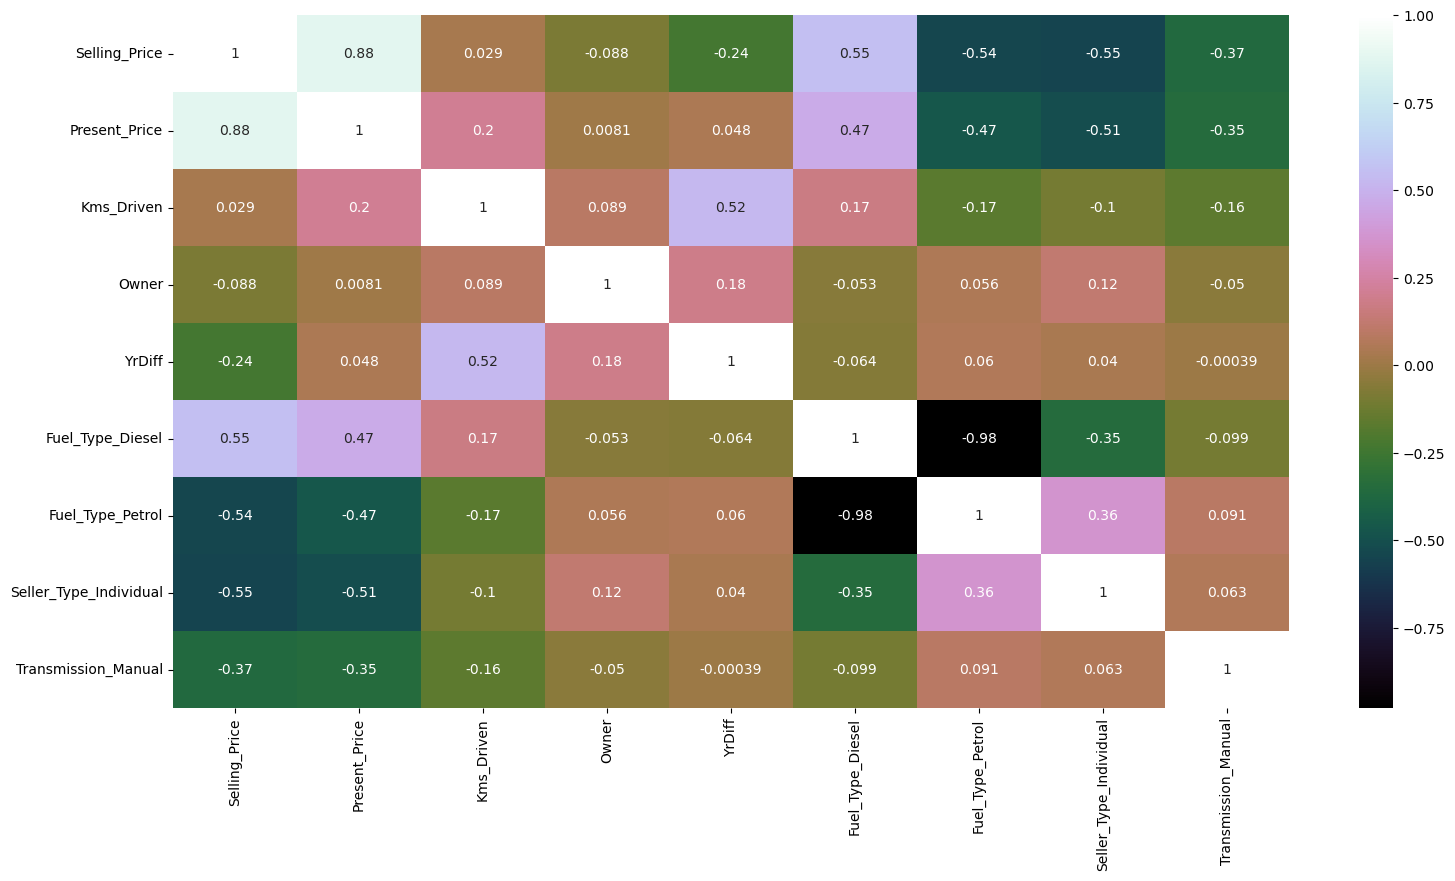

In [20]:
plt.figure(figsize=(18,9))
corr =Cardata.corr()
seaborn.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='cubehelix',annot=True)
plt.show()

**Observations**
- whenever Present Price increases ,the selling price also increase as seen from the correlation value as 0.88
- Kms Driven almost constant with Selling price i.e neutral 
- As the owners counts increases the selling price decrease i.e negative correlation
- Same with the case for YrDiff as observed like Owners
- if the car's fuel type is diesel,the selling price increases,if the car's fuel type is petrol,the selling price decreases
- if the car's Seller type is Indivual,the selling price decreases,if it is delear he will increase the selling price
- if the car's Transmissoion is manual,the selling price decreases,if it is automatic it will increase the selling price
- Also we can drop either of Diesel or petrol since correlation is high

In [21]:
#Cardata=Cardata.drop(['Fuel_Type_Diesel'],1)

In [22]:
Cardata1=Cardata

In [23]:
Cardata1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1


In [24]:
Y=Cardata1[['Selling_Price']]

In [25]:
X=Cardata1.drop(['Selling_Price'],axis=1)

In [26]:
Y.head(2)

,Selling_Price
0,3.35
1,4.75


In [27]:
X.head(2)

,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1


In [28]:
import sklearn
from sklearn.ensemble import ExtraTreesRegressor

In [29]:
model=ExtraTreesRegressor()

In [30]:
model.fit(X,Y)

c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [31]:
model.feature_importances_

array([3.87192310e-01, 4.29137651e-02, 3.48053633e-04, 7.05555846e-02,
       2.21272295e-01, 1.00394088e-02, 1.20895511e-01, 1.46783072e-01])

In [32]:
Assignorder=pd.DataFrame(pd.Series(model.feature_importances_,index=X.columns))

In [33]:
Assignorder=Assignorder.rename(columns={0:"Imp_value"})

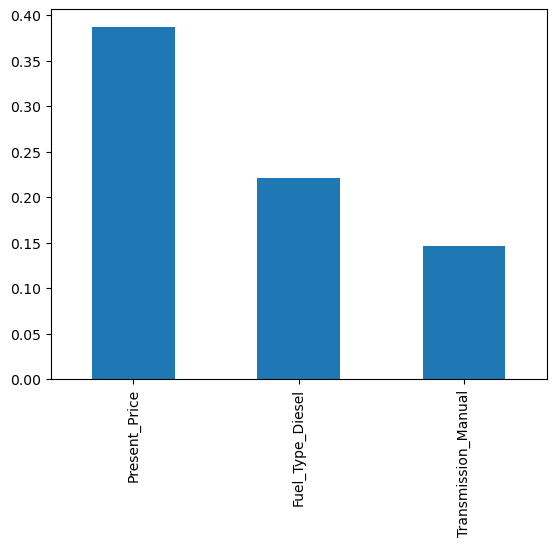

In [34]:
Assignorder['Imp_value'].nlargest(3).plot(kind='bar')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=30)

In [36]:
Y_test

,Selling_Price
63,23.50
120,1.05
130,0.75
61,4.50
110,1.20
...,...
123,1.00
112,1.15
247,5.95
106,1.35


#### Hyperparameters Tunning

In [37]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [38]:
#The minimum number of samples required to split an internal node:

In [39]:
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

In [40]:
max_features=["auto","sqrt"]

In [41]:
min_samples_split=[2,5,10,15,100]

In [42]:
min_samples_leaf=[1,2,5,10]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
random_grid={'n_estimators':n_estimators,
             'max_depth':max_depth,
             'max_features':max_features,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
from sklearn.ensemble import RandomForestRegressor
mod=RandomForestRegressor()

In [46]:
rf_random=RandomizedSearchCV(estimator=mod,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=30,n_jobs=1)

In [47]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.5s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.6s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=au

c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.6s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.7s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.7s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.6s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   0.6s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.9s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.0s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.8s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.9s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.9s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   1.0s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   1.1s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   0.9s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   0.8s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1000; total time=   0.8s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.7s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.7s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.7s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.7s


c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=15, max_

c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Amanc\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Amanc\anaconda3\lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=30, scoring='neg_mean_squared_error',
                   verbose=2)

In [48]:
predictions=rf_random.predict(X_test)

In [49]:
predictions

array([16.6808143 ,  0.99789784,  0.86587918,  5.01364074,  1.14003186,
       16.75853461,  0.53469869,  3.04919296,  8.16163574,  0.51645609,
        3.02540714,  1.85288031,  5.91126542,  5.82180182,  4.80181538,
        5.96286778,  3.90999474,  5.7540603 ,  0.5376724 ,  1.31214182,
        5.88028881,  0.49345227,  0.54019054,  0.51409002,  5.27195673,
        9.1366408 ,  0.81377201,  0.49909169,  0.57767621,  5.39689733,
        6.00188023,  3.0039169 ,  6.42410668,  8.54764239, 16.66933488,
        8.33329102,  3.93260437,  8.29049925,  0.63637695,  1.17367776,
        5.04407365,  1.3952287 ,  4.71948665,  6.19188789,  9.09845291,
        5.37565655,  0.64999756,  0.52930497,  9.02125855, 11.39230758,
        0.60421285, 13.56235426,  0.60648694,  0.90182729, 16.66933488,
        1.21637003,  5.01808859,  3.83853168,  7.18855451,  6.95350904,
        0.94104778,  0.56709181,  9.71702515,  7.77249743,  4.79964885,
        1.06843476,  4.25252525,  7.29793503,  9.02689261, 10.73

In [50]:
Y_test1=Y_test.values

C:\Users\Amanc\AppData\Local\Temp\ipykernel_14516\3229740940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(Y_test1-predictions)


<Axes: ylabel='Density'>

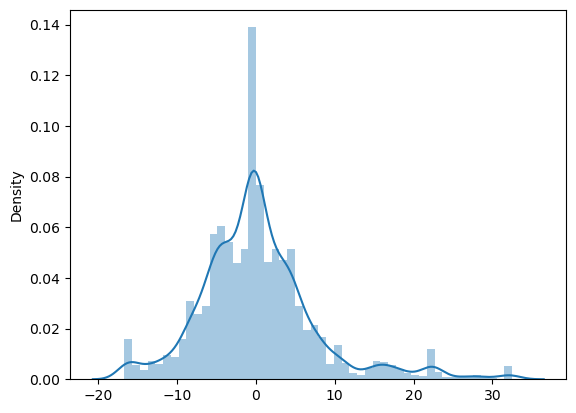

In [51]:
seaborn.distplot(Y_test1-predictions)

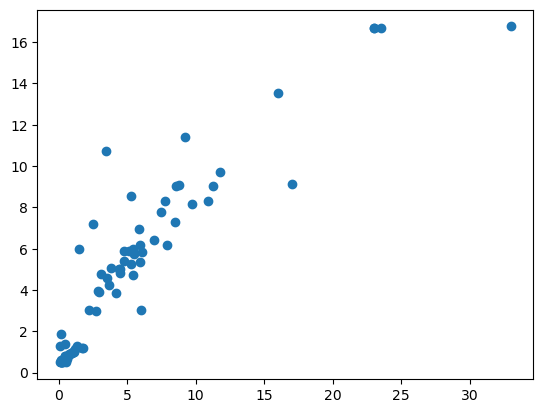

In [52]:
plt.scatter(Y_test1,predictions)

In [53]:
import pickle
file=open('random_forest.pkl','wb')
pickle.dump(rf_random,file)

In [54]:
model = pickle.load(open('random_forest.pkl', 'rb'))

In [55]:
X_train.head(2)

,Present_Price,Kms_Driven,Owner,YrDiff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
272,10.0,27600,0,5,0,1,0,1
92,13.7,75000,0,15,0,1,0,1
